In [1]:
import numpy as np

import pylab
import pandas as pd
from pandas import DataFrame
import sqlite3
import matplotlib.pyplot as plt
import ast
import math
import time
from datetime import datetime
import glob
import sys
import copy
import cv2
from imp import reload
import scipy
from scipy import stats
from scipy.optimize import curve_fit
import csv


from sklearn.mixture import GaussianMixture

# read in db flyProjects to get experimetns at 45° 20_01_07


In [3]:
readin_id2 =pd.DataFrame()
dbs =['_20_01_07.db','_19_12_09.db','_19_11_28.db']
for n in range(len(dbs)):
    print(dbs[n])

    conn = sqlite3.connect("/home/bianca/Documents/github/locustVR/databases/locustProjects"+dbs[n])
    query2 = "SELECT  post0,exp,replicate, nStimuli  FROM projects;" #
    readin_angle = pd.read_sql_query(query2,conn)


    readin_angle['index'] = list(range(len(readin_angle.index)))

    tab2=pd.DataFrame()
    #readin_angle.head(10)

    #['position','angle','distance']

    dist_read = False
    print('readin_anglekeys',readin_angle.keys())
    #60 degree angle
    angle60=(math.pi/180*60)
    angle30=(math.pi/180*30)
    angle45=(math.pi/180*45)
    angle180=(math.pi)

    a=True
    #p= pd.DataFrame(readin_angle,l)#.T.to_dict()
    for i in range(0,250):

        #(readin_angle[readin_angle['index'] == i])
        #250 diff conditions from which to pick available



        if (ast.literal_eval(readin_angle.loc[i].values[0])) != None:
            ang=(ast.literal_eval(readin_angle.loc[i].values[0])['angle'])

            if dist_read == False:
                dist = (ast.literal_eval(readin_angle.loc[i].values[0])['distance'])
                dist_read = True
            if readin_angle['exp'][i] <10: 
                #only experiments <10 are the exp with two post condition, >10 are 3 post cond
                #print(readin_angle['exp'][i])
                #if 
                if ang == angle30 and readin_angle['nStimuli'][i]  <4 and readin_angle['nStimuli'][i] >0:
                    angle_used = ang
                        #selects for 60° cond and without nstim==0 or ==4 (controls with one post cond)
                        #print(i,ang)
                        #readin_angle[i]
                        #del tab
                        #print(readin_angle[readin_angle['index'] == i])
                        #Liste2=Liste2.append(readin_angle[readin_angle['index'] == i])
                    #print(ast.literal_eval(readin_angle.loc[i].values[0])['position'])
                    tab=(readin_angle[readin_angle['index'] == i])
                    tab2=tab2.append(tab,ignore_index=True)
                    if readin_angle['nStimuli'][i]  <4 and readin_angle['nStimuli'][i] >0:
                        #print(readin_angle['nStimuli'][i])
                        pass
                #if ang == angle30 readin_angle['nStimuli'][i]  <4 and readin_angle['nStimuli'][i] >0:



    #readin_angle
    #ang

    #print(tab2.count())
    #print('tab2keys',tab2.keys())
    #print(dist)
    #print(ang, angle_used)
    #tab2
    
    
    #######################EXPERIMENT ID READIN

    conn = sqlite3.connect("/home/bianca/Documents/github/locustVR/databases/locustExperiments"+dbs[n])

    query = "SELECT exp, replicate, date,tStart, expId FROM experiments;"
    readin_id = pd.read_sql_query(query,conn)
    print(readin_id.keys())
    readin_id=readin_id.assign(nStimuli = 5)
    #posi=(ast.literal_eval(readin_angle.loc[0].values[0])['position'])
    #posi=0
    readin_id=readin_id.assign(position_post0_x = 1.0)
    readin_id=readin_id.assign(position_post0_y = 1.0)

    #ang=(ast.literal_eval(readin_angle.loc[i].values[0])['angle'])

    for i in range(0,len(readin_id.index)):
        #iterate through 40 rows of readin_id

        #kombi exp+ replicate in tab2 abgleichen und nStimuli rausschreiben!)
        b=readin_id['exp'][i]
        c=readin_id['replicate'][i]
        e=readin_id['date'][i]
        #tstart=readin_id['tStart'][i]

        for d in range(len(tab2)):
            #iterate through 50 rows of tab2
            if tab2['exp'][d]==b and tab2['replicate'][d]==c:
                #print(tab2['exp'][d], tab2['replicate'][d], tab2['nStimuli'][d]  )

                #print(tab2['nStimuli'][d])
                f=tab2['nStimuli'][d]
                #g=tab2['post0']
                g=(ast.literal_eval(tab2.loc[d].values[0])['position'])
                h=round(g[0], 2)
                k=round(g[1], 2)
                if h == -0.00:
                    h=0.00
                if k == -0.00:
                    k=0.00
                    
                #print(g.keys())
                #print(h,k)
                readin_id['nStimuli'][i]=f

                readin_id['position_post0_x'][i]=h
                readin_id['position_post0_y'][i]=k

    readin_id.reset_index(drop=True, inplace=True) 
    #exper_date='2019-12-12'
    

    
    readin_id2= readin_id2.append(readin_id, ignore_index=True)
    print(readin_id)

    #40 expIDs available

_20_01_07.db
('readin_anglekeys', Index([u'post0', u'exp', u'replicate', u'nStimuli', u'index'], dtype='object'))
Index([u'exp', u'replicate', u'date', u'tStart', u'expId'], dtype='object')


/home/bianca/.local/lib/python2.7/site-packages/ipykernel_launcher.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/bianca/.local/lib/python2.7/site-packages/ipykernel_launcher.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/bianca/.local/lib/python2.7/site-packages/ipykernel_launcher.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


    exp  replicate        date tStart                                 expId  \
0     0          2  2020-01-07  11:59  c0127c9b-3ff9-4c49-8db4-6900ff4c2b2a   
1     0          2  2020-01-07  13:06  54a35a9f-9eb0-4404-bc9d-8ed7b71192c5   
2     0          4  2020-01-07  14:04  7ac51c48-5f5a-4ac3-9930-56772578c1ee   
3     1          3  2020-01-07  15:30  3a1d5deb-e8f7-48a4-aabb-25456f941c43   
4     1          1  2020-01-08  09:18  752b3218-e802-47e8-bbc6-1049f15e6f85   
5     2          4  2020-01-08  11:31  13e69b2f-9760-4625-a309-511af2c5afb2   
6     2          0  2020-01-08  13:12  2a7c4e5b-deb9-4c55-b0f7-2547034b8b4d   
7     2          0  2020-01-08  14:08  da620536-7437-4bf6-a7de-ba36f19b4177   
8     3          3  2020-01-08  17:30  acb6ec35-e1e0-450a-98ca-581b0f21723e   
9     3          4  2020-01-09  10:00  1730f55c-ba6b-467b-96a8-f23c387f2905   
10    3          3  2020-01-09  11:01  a57b486a-c26a-4016-9722-56846965487e   
11    4          1  2020-01-09  12:06  ded361ec-3214

# EXPERIMENT ID READIN

In [4]:
readin_id2

,exp,replicate,date,tStart,expId,nStimuli,position_post0_x,position_post0_y
0,0,2,2020-01-07,11:59,c0127c9b-3ff9-4c49-8db4-6900ff4c2b2a,3,0.00,-2.00
1,0,2,2020-01-07,13:06,54a35a9f-9eb0-4404-bc9d-8ed7b71192c5,3,0.00,-2.00
2,0,4,2020-01-07,14:04,7ac51c48-5f5a-4ac3-9930-56772578c1ee,3,0.00,-2.00
3,1,3,2020-01-07,15:30,3a1d5deb-e8f7-48a4-aabb-25456f941c43,2,0.00,2.00
4,1,1,2020-01-08,09:18,752b3218-e802-47e8-bbc6-1049f15e6f85,3,0.00,2.00
5,2,4,2020-01-08,11:31,13e69b2f-9760-4625-a309-511af2c5afb2,1,2.00,0.00
6,2,0,2020-01-08,13:12,2a7c4e5b-deb9-4c55-b0f7-2547034b8b4d,1,2.00,0.00
7,2,0,2020-01-08,14:08,da620536-7437-4bf6-a7de-ba36f19b4177,1,2.00,0.00
8,3,3,2020-01-08,17:30,acb6ec35-e1e0-450a-98ca-581b0f21723e,3,2.00,0.00
9,3,4,2020-01-09,10:00,1730f55c-ba6b-467b-96a8-f23c387f2905,3,2.00,0.00


# csv

In [94]:
directory = '/home/bianca/Documents/github/locustVR/databases/data_collection/'
filename = '/results.csv'
counting=0
unexist_cntr=0
initialise = False
#for i in readin_id2.index:
for j in range (0,(len(readin_id2))):
#for j in range(77,79):
    #iterate through 20 leftover exp ids in readin_id that have 2 post cond, no control, only 60°
    path = (directory + readin_id2['expId'][j] + filename)
    tstart = readin_id2['tStart'][j]
    exper_date = readin_id2['date'][j]
    print('tstart',tstart)  


    print(path)
    
     
    try:
        df = pd.read_csv(path)
        print(path)
    
        #extends list to experimentID column
        df=df.assign(pos0x = (readin_id2['position_post0_x'][j]))
        df=df.assign(pos0y = (readin_id2['position_post0_y'][j]))
        df=df.assign(date = (readin_id2['date'][j]))
        df=df.assign(tstart = (readin_id2['tStart'][j]))
        
        
        #print(readin_id['expId'][i])




        df.columns = ['x', 'y', 'z',  'cntr', 't', 'nStimuli', 'pos0x', 'pos0y','date','tStart']
        stim = readin_id2['nStimuli'][j]
        #print stim
        #for j in range(0,len(df)):
        #    if df['nStimuli'][j]== stim:

        #select those with stimuli according to readin_in info those with the specific angle
        df=(df.loc[df['nStimuli'] == stim])  

        # iterate through df's lines to calc speed per trial
        #for k in range (len(df)):

        #SPEED calc + addition as column

        df.reset_index(drop=True, inplace=True) 
        trajectory = df
        d_v3 =[]
        window =30
        for i in range(0,len(trajectory)-1): #len(df3)# df3 = +noise
            if i== 0 or df['cntr'][i] != df['cntr'][i+1]:
                jump =True
                merker = i

                #print(merker)

            if jump == False: #and df['cntr'][i] == df['cntr'][i+1]:

                delta=((((trajectory['x'][i]-trajectory['x'][i-window])**2 + (trajectory['y'][i]-trajectory['y'][i-window]) **2)**0.5)/(((trajectory['t'][i]-trajectory['t'][i-window])**2)**0.5))
                if delta*100>10:
                    delta =np.nan
                d_v3.extend([(delta*100)]) #delta is between i and i+window, x is centered in frame
                            # *100 to get cm/s

            if jump ==True:
                d_v3.extend([(np.nan)])
                if merker + window <= i:
                    jump = False
            if i == len(trajectory)-2:
                d_v3.extend([(np.nan)])

        df=df.assign(speed = d_v3)
        #speed_dv=np.array(d_v3)
        #plt.hist(speed_dv[~np.isnan(speed_dv)])
        #plt.show()
        
 



        df.columns = ['x', 'y', 'z',  'cntr', 't', 'nStimuli', 'pos0x', 'pos0y','date','tStart','speed']

        print('j : iterator outer loop',j)
        if initialise == False:
            df3=df
            df3.columns = ['x', 'y', 'z',  'cntr', 't', 'nStimuli', 'pos0x', 'pos0y','date','tStart','speed']
            initialise = True


        if j > 0:
            df3=df3.append(df, ignore_index=True)
            counting+=1
        #print(counting, df.count)


        '''df3=df
        df3=df3.append(df, ignore_index=True)

        df3.columns = ['x', 'y', 'z',  'cntr', 't', 'nStimuli', 'pos0x', 'pos0y']'''

    except:
        print('***************************csv in row %d doesnt exist**********************' %(j))
        unexist_cntr +=1
    
print('tstart', tstart)
#df3 = df3.reset_index()
df3.reset_index(drop=True, inplace=True) 

df3
#df

('tstart', u'11:59')
/home/bianca/Documents/github/locustVR/databases/data_collection/c0127c9b-3ff9-4c49-8db4-6900ff4c2b2a/results.csv
/home/bianca/Documents/github/locustVR/databases/data_collection/c0127c9b-3ff9-4c49-8db4-6900ff4c2b2a/results.csv
('j : iterator outer loop', 0)
('tstart', u'13:06')
/home/bianca/Documents/github/locustVR/databases/data_collection/54a35a9f-9eb0-4404-bc9d-8ed7b71192c5/results.csv
/home/bianca/Documents/github/locustVR/databases/data_collection/54a35a9f-9eb0-4404-bc9d-8ed7b71192c5/results.csv
('j : iterator outer loop', 1)
('tstart', u'14:04')
/home/bianca/Documents/github/locustVR/databases/data_collection/7ac51c48-5f5a-4ac3-9930-56772578c1ee/results.csv
/home/bianca/Documents/github/locustVR/databases/data_collection/7ac51c48-5f5a-4ac3-9930-56772578c1ee/results.csv
('j : iterator outer loop', 2)
('tstart', u'15:30')
/home/bianca/Documents/github/locustVR/databases/data_collection/3a1d5deb-e8f7-48a4-aabb-25456f941c43/results.csv
/home/bianca/Documents/gi

('j : iterator outer loop', 29)
('tstart', u'13:10')
/home/bianca/Documents/github/locustVR/databases/data_collection/06576742-737f-4d2f-96d4-4b443af5cde5/results.csv
/home/bianca/Documents/github/locustVR/databases/data_collection/06576742-737f-4d2f-96d4-4b443af5cde5/results.csv
('j : iterator outer loop', 30)
('tstart', u'14:39')
/home/bianca/Documents/github/locustVR/databases/data_collection/3e23afdc-8a71-496f-8156-20e07f839556/results.csv
/home/bianca/Documents/github/locustVR/databases/data_collection/3e23afdc-8a71-496f-8156-20e07f839556/results.csv
('j : iterator outer loop', 31)
('tstart', u'10:50')
/home/bianca/Documents/github/locustVR/databases/data_collection/c7f84a6e-7645-49a4-8580-dcd190cfdc26/results.csv
/home/bianca/Documents/github/locustVR/databases/data_collection/c7f84a6e-7645-49a4-8580-dcd190cfdc26/results.csv
('j : iterator outer loop', 32)
('tstart', u'11:58')
/home/bianca/Documents/github/locustVR/databases/data_collection/573ae5a4-af21-4bed-9485-11e0518ac8b5/re

('j : iterator outer loop', 59)
('tstart', u'11:49')
/home/bianca/Documents/github/locustVR/databases/data_collection/bb9e6a9d-67e1-40de-9f4c-464da0a824ba/results.csv
/home/bianca/Documents/github/locustVR/databases/data_collection/bb9e6a9d-67e1-40de-9f4c-464da0a824ba/results.csv
('j : iterator outer loop', 60)
('tstart', u'14:43')
/home/bianca/Documents/github/locustVR/databases/data_collection/4c9a6d29-ac3d-4ed8-a67d-f5a75d5cec9c/results.csv
/home/bianca/Documents/github/locustVR/databases/data_collection/4c9a6d29-ac3d-4ed8-a67d-f5a75d5cec9c/results.csv
('j : iterator outer loop', 61)
('tstart', u'10:17')
/home/bianca/Documents/github/locustVR/databases/data_collection/353adab2-d51f-4885-adba-508ba2cac467/results.csv
/home/bianca/Documents/github/locustVR/databases/data_collection/353adab2-d51f-4885-adba-508ba2cac467/results.csv
('j : iterator outer loop', 62)
('tstart', u'13:13')
/home/bianca/Documents/github/locustVR/databases/data_collection/3a521430-7aa6-412b-8d00-62524874d36a/re

,x,y,z,cntr,t,nStimuli,pos0x,pos0y,date,tStart,speed
0,-0.000327,0.000089,0,0.0,1950.023793,3.0,0.00,-2.00,2020-01-07,11:59,NaN
1,-0.001907,0.000506,0,0.0,1950.068343,3.0,0.00,-2.00,2020-01-07,11:59,NaN
2,-0.003092,0.000826,0,0.0,1950.110276,3.0,0.00,-2.00,2020-01-07,11:59,NaN
3,-0.003976,0.001098,0,0.0,1950.146753,3.0,0.00,-2.00,2020-01-07,11:59,NaN
4,-0.005150,0.001449,0,0.0,1950.181044,3.0,0.00,-2.00,2020-01-07,11:59,NaN
5,-0.005977,0.001669,0,0.0,1950.216890,3.0,0.00,-2.00,2020-01-07,11:59,NaN
6,-0.007010,0.001923,0,0.0,1950.250543,3.0,0.00,-2.00,2020-01-07,11:59,NaN
7,-0.007729,0.002072,0,0.0,1950.287638,3.0,0.00,-2.00,2020-01-07,11:59,NaN
8,-0.008651,0.002233,0,0.0,1950.325561,3.0,0.00,-2.00,2020-01-07,11:59,NaN
9,-0.009310,0.002326,0,0.0,1950.359229,3.0,0.00,-2.00,2020-01-07,11:59,NaN


In [97]:
higher=df3['speed']>9
#speed_dv=np.array(d_v3)

#plt.hist(speed_dv[~np.isnan(speed_dv)])


df3[higher]

,x,y,z,cntr,t,nStimuli,pos0x,pos0y,date,tStart,speed
90493,0.354309,-0.446909,0,1.0,543.559573,1.0,2.00,0.00,2020-01-08,11:31,9.278918
90494,0.351791,-0.455404,0,1.0,543.603116,1.0,2.00,0.00,2020-01-08,11:31,9.960669
91673,-0.225572,0.599629,0,2.0,594.506208,1.0,2.00,0.00,2020-01-08,11:31,9.639198
91693,-0.180523,0.573742,0,2.0,595.321676,1.0,2.00,0.00,2020-01-08,11:31,9.755981
91694,-0.181324,0.573715,0,2.0,595.363303,1.0,2.00,0.00,2020-01-08,11:31,9.179289
99314,-0.158908,-0.223579,0,3.0,893.511225,1.0,2.00,0.00,2020-01-08,11:31,9.117387
99315,-0.168159,-0.225975,0,3.0,893.546637,1.0,2.00,0.00,2020-01-08,11:31,9.935131
99336,-0.202339,-0.220505,0,3.0,894.346770,1.0,2.00,0.00,2020-01-08,11:31,9.945833
99337,-0.202245,-0.220874,0,3.0,894.379965,1.0,2.00,0.00,2020-01-08,11:31,9.093636
1344694,0.109445,-0.119093,0,0.0,844.571091,2.0,-1.41,-1.41,2019-12-04,14:21,9.066183



# rotate all x and y values at certain ang from experiments

In [73]:
print(angle_used*180/math.pi)


30.0


In [74]:
rotaa= np.zeros([len(df3),2])
#rotaa[][1]=3
print(rotaa[4][1])


0.0


In [75]:
t0 = time.time()
#8 angles in matrices depending on starting position of post0

#change habp= half the angle between posts angle accord. to current investigation!!!:
#here for 60° angle half is 30° so pi/6
#habp = (math.pi)/6   #60
#habp = (math.pi)/12
habp = angle_used/2

#rotation angles; referring to post position:
# post1 immer ccc zu post0. also in kreisrichtung (pihalbe, pi..) drehrichtung ist hier richtig!!!
ang5_0 = 2  *math.pi - habp
ang33  = 1.75*math.pi - habp

ang0_5 = 1.5*math.pi - habp
angm33 = 1.25*math.pi - habp

angm5_0 = 1*math.pi   - habp
angm3m3 = 0.75*math.pi - habp

ang0_m5 = 0.5*math.pi - habp
ang3m3 = 0.25*math.pi - habp

def rotation(x,y, theta):
    #theta = 0
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c,-s), (s, c)))
    a,b=np.dot(R,[x,y])
    
    return a,b

rot=[]

dist_45 = round(((dist**2)/2)**0.5 , 2)   #square_root_2a_sq, distance at on x or y axis at 45 degree 


for l in range(len(df3)): #(): len(df3) 0,40000
    #print('df3 in spalte x',df3['x'][l])
    x=df3['x'][l]
    y=df3['y'][l]
    #print(x,y)
    
    if df3['pos0x'][l]== dist and df3['pos0y'][l]== 0.00:
        theta = ang5_0
        
    if df3['pos0x'][l]== dist_45 and df3['pos0y'][l]== dist_45:
        theta = ang33
        
    if df3['pos0x'][l]== 0.00 and df3['pos0y'][l]== dist:
        theta = ang0_5
        
    if df3['pos0x'][l]== -dist_45 and df3['pos0y'][l]== dist_45:
        theta = angm33
        
    if df3['pos0x'][l]== -dist and df3['pos0y'][l]== 0.00:
        theta = angm5_0
        
    if df3['pos0x'][l]== -dist_45 and df3['pos0y'][l]== -dist_45:
        theta = angm3m3
        
    if df3['pos0x'][l]== 0.00 and df3['pos0y'][l]== -dist:
        theta = ang0_m5
        

    if df3['pos0x'][l]== dist_45 and df3['pos0y'][l]== -dist_45:
        theta = ang3m3
    coord =     rotation(x,y,theta)
    #coord.extend= rotation(x,y,theta)
    rotaa[l][0]=coord[0]
    rotaa[l][1]=coord[1]
    #print('rot',rotation(x,y,theta))
    #df=df.assign(pos0x = (readin_id['position_post0_x'][i]))
    #df4['x'][l]=(coord[0])
    #df4['y'][l]=(coord[1])
    #rota.extend(coord[0])
    #rotaa.columns = ['x', 'y', 'z',  'cntr', 't', 'nStimuli', 'pos0x', 'pos0y']
    #rot.extend([(rotation(x,y,theta))])
    #list rot contains all rotated values at 60° from all experiments!
    #x_rot,y_rot=    rotation(x,y,theta)  
#print('length df3',len(df3))
#print('length of rot',len(rot))
#print(rot[0][0])
#print(coord[1])
df3=df3.assign(x_rot = (rotaa[: ,0]))   
df3=df3.assign(y_rot = (rotaa[: ,1]))  
print(df3)

                x         y  z  cntr            t  nStimuli  pos0x  pos0y  \
0       -0.000327  0.000089  0   0.0  1950.023793       3.0   0.00  -2.00   
1       -0.001907  0.000506  0   0.0  1950.068343       3.0   0.00  -2.00   
2       -0.003092  0.000826  0   0.0  1950.110276       3.0   0.00  -2.00   
3       -0.003976  0.001098  0   0.0  1950.146753       3.0   0.00  -2.00   
4       -0.005150  0.001449  0   0.0  1950.181044       3.0   0.00  -2.00   
5       -0.005977  0.001669  0   0.0  1950.216890       3.0   0.00  -2.00   
6       -0.007010  0.001923  0   0.0  1950.250543       3.0   0.00  -2.00   
7       -0.007729  0.002072  0   0.0  1950.287638       3.0   0.00  -2.00   
8       -0.008651  0.002233  0   0.0  1950.325561       3.0   0.00  -2.00   
9       -0.009310  0.002326  0   0.0  1950.359229       3.0   0.00  -2.00   
10      -0.010138  0.002402  0   0.0  1950.393585       3.0   0.00  -2.00   
11      -0.010727  0.002435  0   0.0  1950.427473       3.0   0.00  -2.00   

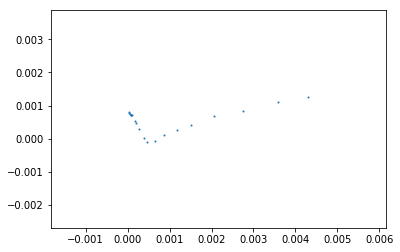

In [649]:
start=47800
plt.scatter(df3['x_rot'][start:start+20],df3['y_rot'][start:start+20], s=1, alpha= 1.)

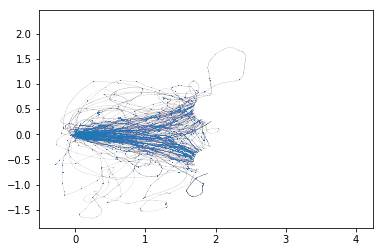

In [98]:
plt.scatter(df6['x_rot'],df6['y_rot'], s=1, alpha= 0.005)

In [636]:
nprot = np.array(df3)

In [99]:
df3.head

<bound method DataFrame.head of                 x         y  z  cntr            t  nStimuli  pos0x  pos0y  \
0       -0.000327  0.000089  0   0.0  1950.023793       3.0   0.00  -2.00   
1       -0.001907  0.000506  0   0.0  1950.068343       3.0   0.00  -2.00   
2       -0.003092  0.000826  0   0.0  1950.110276       3.0   0.00  -2.00   
3       -0.003976  0.001098  0   0.0  1950.146753       3.0   0.00  -2.00   
4       -0.005150  0.001449  0   0.0  1950.181044       3.0   0.00  -2.00   
5       -0.005977  0.001669  0   0.0  1950.216890       3.0   0.00  -2.00   
6       -0.007010  0.001923  0   0.0  1950.250543       3.0   0.00  -2.00   
7       -0.007729  0.002072  0   0.0  1950.287638       3.0   0.00  -2.00   
8       -0.008651  0.002233  0   0.0  1950.325561       3.0   0.00  -2.00   
9       -0.009310  0.002326  0   0.0  1950.359229       3.0   0.00  -2.00   
10      -0.010138  0.002402  0   0.0  1950.393585       3.0   0.00  -2.00   
11      -0.010727  0.002435  0   0.0  1950.4

# reduce noise:
#take out all trajectories that don't end in dist of 30 cm to post


In [84]:
dot_x

1.9318516525781366

In [81]:
add = False
line =[0] #gives info of end of trial
cn =0
post0_cntr =0
post1_cntr =0
bad_loc =0
good_loc =0
#define centre of posts:
dot_x = math.cos(habp)*dist
dot_y = math.sin(habp)*dist
df6=pd.DataFrame()
p0_traj=pd.DataFrame()
p1_traj=pd.DataFrame()

#distance to centre of post(0,1) in last row of trial:
#for l in range (0,5000):
for l in range (len(df3)-1):

    if df3['cntr'][l] != df3['cntr'][l+1] or df3['tStart'][l] != df3['tStart'][l+1]:
        #print(df3['cntr'][l],df3['cntr'][l+1], l, df3['index'][l])
        line.append(l)
        cn += 1
        
        #check if locust position in line l is close enough to post:
        lo_p0_dist = ((dot_x- df3['x_rot'][l]     )**2 + (-dot_y- df3['y_rot'][l]     )**2)**0.5 
        lo_p1_dist = ((dot_x-  df3['x_rot'][l]    )**2 + (dot_y-  df3['y_rot'][l]   )**2)**0.5 
        
        
        if lo_p0_dist < 0.3 and df3['x_rot'][l] < (dot_x) or lo_p1_dist < 0.3 and df3['x_rot'][l] < (dot_x+0.1):
            good_loc += 1
            #print(lo_p0_dist,lo_p1_dist )
            #print(l,'last row of a dataset to be added')
            #add = True
            line_start_incl = line[cn-1]
            df_add=df3.loc[line_start_incl : l]
            #print('include lines from to',line_start_incl, l)
            
            if lo_p0_dist < 0.3 and df3['x_rot'][l] < (dot_x+0.1):
                
                #cal dist to post the locust is ending up at
                p0_d=[]
                for n in range(line_start_incl,l+1):
                    lo_p0_dist = ((dot_x- df_add['x_rot'][n])**2 + (-dot_y- df_add['y_rot'][n])**2)**0.5 
                    p0_d.append(lo_p0_dist)
                df_add=df_add.assign(distance = (p0_d))   

                
                p0_traj =  p0_traj.append(df_add, ignore_index=True)     
                post0_cntr +=1
            if lo_p1_dist < 0.3 and df3['x_rot'][l] < (dot_x+0.1): 
                p1_d=[]
                for n in range(line_start_incl,l+1):
                    lo_p1_dist = ((dot_x- df_add['x_rot'][n])**2 + (-dot_y- df_add['y_rot'][n])**2)**0.5 
                    p1_d.append(lo_p1_dist)
                    
                df_add=df_add.assign(distance = (p1_d))   

                p1_traj =  p1_traj.append(df_add, ignore_index=True)       
                post1_cntr +=1
                
            #append no noise parts on df6:
            df6=df6.append(df_add, ignore_index=True)
            
        if lo_p0_dist > 0.3 and lo_p1_dist > 0.3:
            bad_loc += 1

            
print('post0:',post0_cntr,'post1:',post1_cntr, 'no post reached:', bad_loc)
            
#print(line)


('post0:', 65, 'post1:', 88, 'no post reached:', 1118)


In [85]:
cn

1193

In [86]:
df6.tail(20)

,x,y,z,cntr,t,nStimuli,pos0x,pos0y,date,tStart,speed,x_rot,y_rot,distance
490099,0.100776,1.744865,0,7.0,2072.442925,3.0,0.0,2.0,2019-12-06,18:40,5.215023,1.659327,-0.548946,0.274317
490100,0.099051,1.746163,0,7.0,2072.480141,3.0,0.0,2.0,2019-12-06,18:40,5.211066,1.661028,-0.547616,0.272478
490101,0.097673,1.747142,0,7.0,2072.510629,3.0,0.0,2.0,2019-12-06,18:40,5.255412,1.662330,-0.546539,0.271067
490102,0.096713,1.747797,0,7.0,2072.538955,3.0,0.0,2.0,2019-12-06,18:40,5.211351,1.663211,-0.545781,0.270111
490103,0.095240,1.748777,0,7.0,2072.570247,3.0,0.0,2.0,2019-12-06,18:40,5.254920,1.664538,-0.544612,0.268671
490104,0.093274,1.750068,0,7.0,2072.601697,3.0,0.0,2.0,2019-12-06,18:40,5.337620,1.666295,-0.543047,0.266770
490105,0.092300,1.750700,0,7.0,2072.629400,3.0,0.0,2.0,2019-12-06,18:40,5.310634,1.667157,-0.542269,0.265838
490106,0.090402,1.751945,0,7.0,2072.665247,3.0,0.0,2.0,2019-12-06,18:40,5.345677,1.668851,-0.540758,0.264015
490107,0.088558,1.753148,0,7.0,2072.702783,3.0,0.0,2.0,2019-12-06,18:40,5.406878,1.670490,-0.539288,0.262257
490108,0.087611,1.753725,0,7.0,2072.732113,3.0,0.0,2.0,2019-12-06,18:40,5.401263,1.671293,-0.538524,0.261394


/home/bianca/.local/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys


<function matplotlib.pyplot.show>

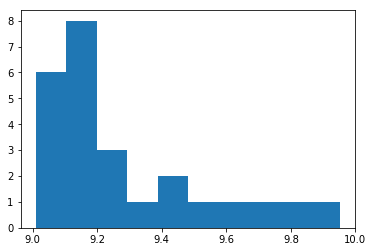

In [78]:

#speed_dv=np.array(d_v3)
#speed = df6['speed']

# speed above threshold 9cm/s = NaN
'''speed=np.array(df6['speed'])
speed[np.where(speed<9)[0]] = np.nan
plt.hist(speed[~np.isnan(speed)])
plt.xlim = [0,8]
plt.show'''



#        spee[np.where(spee>9)[0]] = np.nan
#        spee_selecto = (spee>0.8 )
#        #spee_selector =  (spee<9 )
#plt.hist(spee[ spee_selecto], bins= 160, label='')
        #plt.xlim([1,9])
        #plt.ylim([1,9])
        #plt.show()

In [101]:
# calc direction
dir_vec = []
#or i in range(0,100):
for i in range(len(df6)-1):
#math.isnan(a)
    if math.isnan(df6['speed'][i]):
        direction_vec = np.nan
    else:
        vec_length = (((df6['x_rot'][i+1]-df6['x_rot'][i])**2+(df6['y_rot'][i+1]-df6['y_rot'][i])**2)**0.5)
        direction_vec =( (df6['x_rot'][i+1]-df6['x_rot'][i])/vec_length,(df6['y_rot'][i+1]-df6['y_rot'][i])/vec_length)
    
    dir_vec.append(direction_vec)
    if i == len(df6)-2:
        dir_vec.append(np.nan)
df6=df6.assign(direction= dir_vec)
#irection_vec

/home/bianca/.local/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


In [367]:
#take out single points
df6 = df6[df6['x_rot']<2.8]


# **************************************EXPORT

In [378]:
path = '/home/bianca/Documents/github/locustVR/plotting/csv_rot_data/'
with open(path+'two_post_date_speed_dist_stop'+'_'+str(ANGLE)  +'.csv', 'w') as output:
    csv.writer(output, delimiter=',').writerows(np.array(df6))
 


# subset speed<0.3, stop column in df6

In [370]:
speeds=np.array(df6['speed'])


#df6 with mask at low speed
speed_low_sel = (speeds<0.3)
subset_df = df6[speed_low_sel].reset_index()


#df6.describe()



/home/bianca/.local/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """


In [371]:
line =np.zeros([1500,2])
#line gives 0: start, 1: end frame of at least 25 stop frames 
cn =0
#for i in range(len(subset_df)-1):
started = False    
frame = 50   

 

for l in range (len(subset_df)-1):
    if subset_df['index'][l]+1 == subset_df['index'][l+1]:
        if started == False:
            #begin = subset_df['index'][i]
            started = True
            line[cn][0]=subset_df['index'][l]
        else:
            pass
            
    if subset_df['index'][l]+1 != subset_df['index'][l+1]:
        #line.append(l)
        if started == True:
            line[cn][1]=subset_df['index'][l]
            cn += 1
            started = False
#include last line        
if l == len(subset_df)-2:
    line[cn][1]=subset_df['index'][l+1]

#check if at least 25 frames have speed below 0.3, otherwise set array to 0:     
for v in range (len(line)):
    if (line[v][1]-line[v][0]) >= frame:
        pass
        #print('bigger frame')
    else:
        line[v][1] = 0
        line[v][0] = 0

   
#create a 'stop' array to append to df6, 1 = stop for at least 25 frames    , 0 = no stop or shorter 25 frames
stopper = np.zeros(len(df6))


In [372]:
for s in range (len(line)):
    
    print(line[s][0],line[s][1])
    stopper[int(line[s][0]):int(line[s][1])]=1

df6=df6.assign(stop=stopper)


(147.0, 333.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(2601.0, 2712.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(4318.0, 4472.0)
(0.0, 0.0)
(0.0, 0.0)
(5405.0, 5457.0)
(5532.0, 5865.0)
(6215.0, 6642.0)
(7067.0, 7174.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(8154.0, 8578.0)
(8884.0, 8953.0)
(0.0, 0.0)
(9453.0, 9652.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(11296.0, 11400.0)
(0.0, 0.0)
(11435.0, 11547.0)
(0.0, 0.0)
(0.0, 0.0)
(11593.0, 11791.0)
(0.0, 0.0)
(12130.0, 12188.0)
(0.0, 0.0)
(13440.0, 13531.0)
(13777.0, 14369.0)
(0.0, 0.0)
(16450.0, 16573.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(17895.0, 18098.0)
(0.0, 0.0)
(18588.0, 18674.0)
(18726.0, 18827.0)
(0.0, 0.0)
(0.0, 0.0)
(19786.0, 19846.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(21170.0, 21233.0)
(0.0, 0.0)
(0.0, 0.0)
(22175.0, 22262.0)
(0.0, 0.0)
(23395.0, 23491.0)
(0.0, 0.0)
(25625.0, 25783.0)
(26307.0, 26452.0)
(26824.0, 26986.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(28017.0, 2811

In [388]:
df6.head(100)

,x,y,z,cntr,t,nStimuli,pos0x,pos0y,date,tStart,speed,x_rot,y_rot,distance,direction,stop
0,-0.000327,0.000089,0,0.0,1950.023793,3.0,0.0,-2.0,2020-01-07,11:59,NaN,-0.000171,-0.000293,2.000089,NaN,0.0
1,-0.001907,0.000506,0,0.0,1950.068343,3.0,0.0,-2.0,2020-01-07,11:59,NaN,-0.000982,-0.001711,2.000507,NaN,0.0
2,-0.003092,0.000826,0,0.0,1950.110276,3.0,0.0,-2.0,2020-01-07,11:59,NaN,-0.001598,-0.002773,2.000828,NaN,0.0
3,-0.003976,0.001098,0,0.0,1950.146753,3.0,0.0,-2.0,2020-01-07,11:59,NaN,-0.002090,-0.003557,2.001102,NaN,0.0
4,-0.005150,0.001449,0,0.0,1950.181044,3.0,0.0,-2.0,2020-01-07,11:59,NaN,-0.002732,-0.004600,2.001455,NaN,0.0
5,-0.005977,0.001669,0,0.0,1950.216890,3.0,0.0,-2.0,2020-01-07,11:59,NaN,-0.003159,-0.005341,2.001678,NaN,0.0
6,-0.007010,0.001923,0,0.0,1950.250543,3.0,0.0,-2.0,2020-01-07,11:59,NaN,-0.003672,-0.006273,2.001935,NaN,0.0
7,-0.007729,0.002072,0,0.0,1950.287638,3.0,0.0,-2.0,2020-01-07,11:59,NaN,-0.004002,-0.006929,2.002087,NaN,0.0
8,-0.008651,0.002233,0,0.0,1950.325561,3.0,0.0,-2.0,2020-01-07,11:59,NaN,-0.004396,-0.007778,2.002252,NaN,0.0
9,-0.009310,0.002326,0,0.0,1950.359229,3.0,0.0,-2.0,2020-01-07,11:59,NaN,-0.004656,-0.008391,2.002347,NaN,0.0


In [374]:
stop_1 = df6[df6['stop']==1.0]
#stop_subset = np.array(df6[np.where['stop']==1.0])
#speeds[np.where(speeds>9)[0]] = np.nan


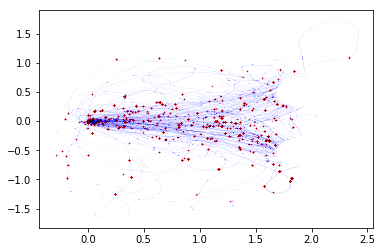

In [375]:
trajectory = df6_copy#p1_traj # p0_traj df6 #all without noise # df3 with noise
color =  'black'  #speeds #
plt.scatter(np.array(trajectory)[:,11], np.array(trajectory)[:,12],c='blue' ,s=0.05, alpha=0.007)# s=0.0005, alpha=0.5) #c=speeds   'black'

trajectory = stop_1
plt.scatter(np.array(trajectory)[:,11], np.array(trajectory)[:,12],c='red' ,s=0.4, alpha=0.007)# s=0.0005, alpha=0.5) #c=speeds   'black'

#plt.xlim(0,2.5)


filename = '/home/bianca/Documents/github/locustVR/plotting/'+'_2post_stops'+ '.png'

plt.savefig(filename, dpi=(350))
plt.show()

(0, 3000)

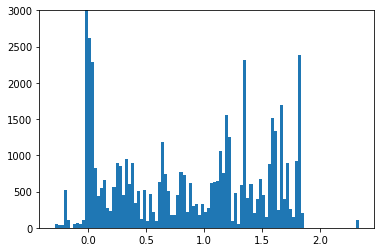

In [392]:

trajectory = stop_1
#plt.hist(np.array(trajectory)[:,13])#, np.array(trajectory)[:,12],c='red' ,s=0.4, alpha=0.007)# s=0.0005, alpha=0.5) #c=speeds   'black'
plt.hist(stop_1['x_rot'], bins=100)
#plt.hist(distances1[stop_selector], bins= 300, label='')
plt.ylim(0,3000)

In [2]:
plt.scatter(np.array(trajectory)[:,11], np.array(trajectory)[:,12],c='red' ,s=0.4, alpha=0.007)# s=0.0005, alpha=0.5) #c=speeds   'black'


NameError: name 'trajectory' is not defined

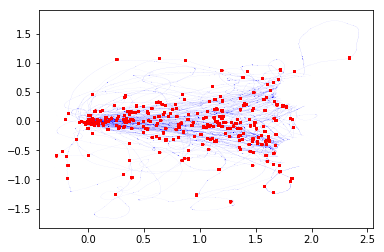

In [393]:
trajectory = df6#p1_traj # p0_traj df6 #all without noise # df3 with noise
color =  'black'  #speeds #
plt.scatter(np.array(trajectory)[:,11], np.array(trajectory)[:,12],c='blue' ,s=0.05, alpha=0.007)# s=0.0005, alpha=0.5) #c=speeds   'black'

trajectory = stop_1
plt.scatter(np.array(trajectory)[:,11], np.array(trajectory)[:,12],c='red' ,s=1, alpha=1)# s=0.0005, alpha=0.5) #c=speeds   'black'


# Plotting


In [17]:
#plt.hist(np.array(rot))

In [18]:
ang3= (ang*180)/math.pi



print(ang3,dot_x, dot_y,ang)
math.cos(ang)

a=30.0
str(int(a))

(59.99999999999999, 1.9318516525781366, 0.5176380902050415, 1.0471975511965976)


'30'

In [19]:
type(speeds)

if type(c) is np.ndarray:
    col_param = 'speed_col'    
else:
    col_param = 'black'
print(col_param)

NameError: name 'speeds' is not defined

('angle between posts:', '30')
black


TypeError: 'list' object is not callable

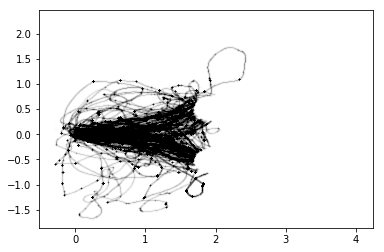

In [18]:
## df3 is original trajectories, df6 is noise reduced; only traject that FINISH at the post
ANGLE = np.round(angle_used*180/math.pi).astype(int)
print('angle between posts:', str(ANGLE))
trajectory = df6#p1_traj # p0_traj df6 #all without noise # df3 with noise
now= datetime.now()
act_date = now.strftime('%Y-%m-%d')

#trajectories
color =  'black'  #speeds #
plt.scatter(np.array(trajectory)[:,9], np.array(trajectory)[:,10],c=color ,s=0.5, alpha=0.009)# s=0.0005, alpha=0.5) #c=speeds   'black'

if type(color) is np.ndarray:
    col_param = 'speed_col'    
else:
    col_param = 'black'
print(col_param)


#posts (approx size)
dot_x = math.cos(habp)*dist
dot_y = math.sin(habp)*dist
#plt.scatter(dot_x,dot_y, c='red', s=2900)
#plt.scatter(dot_x,-dot_y, c='blue', s=2900)

#limits of x and y axis
plt.xlim(-0.5,4)
plt.ylim(-2.3,2.3)
#appropriate size of posts in grey lines
plotting_angles = list(range(0,361,5))
ploX=[]
ploY=[]
plo=[np.linspace(0, 360, num=100)]
for i in range(0,100):
    ploX.extend([(math.cos(plo[0][i]))])
    ploY.extend([(math.sin(plo[0][i]))])
    plt.scatter((np.array(ploX)[i])*0.25+dot_x, np.array(ploY)[i]*0.25+dot_y, c='blue', s=1, alpha=0.5)
    plt.scatter((np.array(ploX)[i])*0.25+dot_x, np.array(ploY)[i]*0.25-dot_y, c='blue', s=1, alpha=0.5)
    
#act_date
filename = '/home/bianca/Documents/github/locustVR/plotting/'+str(ANGLE) + '_2post_no_noise_p1'+ col_param +'_'+exper_date+'_'+'_all_dbs_'+ '.png'
#filename = '/home/bianca/Documents/github/locustVR/plotting/'+str(ANGLE) + '_2post_'+ col_param +'_'+exper_date+'_'+tstart+ '.png'

#speeds[np.where(speeds>4)[0]] = 0
#fig.set_dpi(100)

#plt.savefig(filename, dpi=(250))

In [202]:
#trajectory = p0_traj
habp

0.2617993877991494

In [22]:

xs = np.array(trajectory['x_rot'])
ys = np.array(trajectory['y_rot'])


In [23]:
nbins = 251      #bins 280, val 171      300,211  , 300 val=171,221
peak_threshold = 0.8
post0_x = dot_x
post0_y = -dot_y
post1_y = dot_y
thr = 0.9

def density_map(x, y, stats=True):

    val = 71 #201

    blur = (11,11) if stats == True else (val,val) #blur 11,11
    r = ([[0, post0_x], [post0_y, post1_y]])
    
    h, xedge, yedge, image = plt.hist2d(x, y, bins=nbins, normed=True, range=r)


    tmp_img = np.flipud(np.rot90(cv2.GaussianBlur(h, blur, 0)))
    for i in range(0, nbins):
        
        #max_val = np.sum(tmp_img[:, i])/(1+i**0.25)
        max_val = np.max(tmp_img[:, i])
        tmp_img[:, i] = tmp_img[:, i] / max_val
        #tmp_img[(tmp_img[:, i])>thr, i]=0.9
        #tmp_img[:, i] = tmp_img[:, i] / 0.9
    return tmp_img

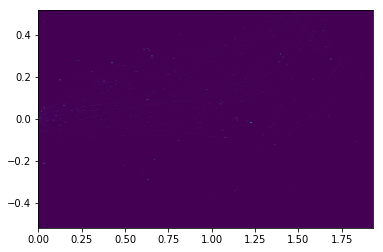

In [29]:
img = density_map(xs, ys, stats=False)


x_peaks = np.where(img > peak_threshold)[1] * post0_x / nbins
y_peaks = np.where(img > peak_threshold)[0] * (post0_y - post1_y) / nbins + post1_y

In [30]:
post0_x

1.9318516525781366

In [31]:
Both=img_p1+img_p0
for i in range(0, nbins):
        
        #max_val = np.sum(tmp_img[:, i])/(1+i**0.25)
    max_val = np.max(Both[:, i])
    Both[:, i] = Both[:, i] / max_val
        #tmp_img[(tmp_img[:, i])>thr, i]=0.9
        #tmp_img[:, i] = tmp_img[:, i] / 0.9
    

NameError: name 'img_p1' is not defined

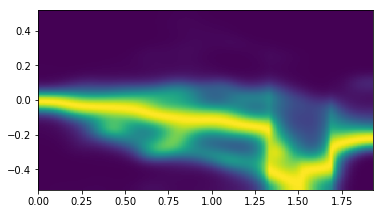

In [32]:
plt.imshow(img_p0 ** 2, extent=[0, post0_x, post0_y, post1_y])

filename = '/home/bianca/Documents/github/locustVR/plotting/'+str(ANGLE) + '_2post_checkp1+0'+str(nbins)+ '_'+exper_date+'_'+'heat'+ '.png'

plt.savefig(filename, dpi=(250))

# piece wise function to model

In [ ]:


def fitfunc(x,p,q):
    if x<p:
        return 0
    else:
        return np.abs(x-p)**q

fitfunc_vec = np.vectorize(fitfunc) #vectorize so you can use func with array

def fitfunc_vec_self(x,p,q):
    y = np.zeros(x.shape)
    for i in range(len(y)):
        y[i]=fitfunc(x[i],p,q)
    return y

# fit the parameter for the function
fit_params, pcov = curve_fit(fitfunc_vec_self, x_fit, y_fit,p0=[0.04,0.1],maxfev=10000)


In [189]:


'''def forceAspect(ax,aspect=1):
    im = ax.get_images()
    extent =  im[0].get_extent()
    ax.set_aspect(abs((extent[5]-extent[1])/(extent[5]-extent[2]))/aspect)

#data = np.random.rand(0,2)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(data)
ax.set_xlabel('xlabel')
ax.set_aspect(1)
plt.scatter(np.array(rot)[50:,0], np.array(rot)[50:,1],c=color ,s=0.5, alpha=0.02)# s=0.0005, alpha=0.5) #c=speeds   'black'
'''

"def forceAspect(ax,aspect=1):\n    im = ax.get_images()\n    extent =  im[0].get_extent()\n    ax.set_aspect(abs((extent[5]-extent[1])/(extent[5]-extent[2]))/aspect)\n\n#data = np.random.rand(0,2)\n\nfig = plt.figure()\nax = fig.add_subplot(111)\nax.imshow(data)\nax.set_xlabel('xlabel')\nax.set_aspect(1)\nplt.scatter(np.array(rot)[50:,0], np.array(rot)[50:,1],c=color ,s=0.5, alpha=0.02)# s=0.0005, alpha=0.5) #c=speeds   'black'\n"

# plotting speed

In [104]:
#taking unrotated x,y values from df3
#if df['nStimuli'][j]== stim:
#print(df3['y'][i])  
#i=10000 

#need of implementation speed in relation to post-distance or starting point distance. otherwise two different locusts 
#plotted on top of each other don't make sense. they need some synchronization which is post-distance?? 
#bifurcation point distance?
window = 30 #even number!

#original unturned values

'''d_v = []
for i in range(window,(len(df6))): #len(df3)
    d=((((df6['x'][i]-df6['x'][i-window])**2 + (df6['y'][i]-df6['y'][i-window])**2)**0.5)/(df6['t'][i]-df6['t'][i-window]))
    #if d != 0.0:
        #d_v=( )

    #plt.scatter(np.array(rot)[:,0], np.array(rot)[:,1], c='black', s=1, alpha=0.01)
    #plt.scatter(df4['x'], df4['y'], c='black', s=1, alpha=0.01)
    #speed relative to location on x
    d_v.extend([(d*100,df6['x'][i+window/2])]) # *100 to get cm/s'''
    #speed to time
    #d_v.extend([(d*100,df3['t'][i])]) # *100 to get cm/s


"d_v = []\nfor i in range(window,(len(df6))): #len(df3)\n    d=((((df6['x'][i]-df6['x'][i-window])**2 + (df6['y'][i]-df6['y'][i-window])**2)**0.5)/(df6['t'][i]-df6['t'][i-window]))\n    #if d != 0.0:\n        #d_v=( )\n\n    #plt.scatter(np.array(rot)[:,0], np.array(rot)[:,1], c='black', s=1, alpha=0.01)\n    #plt.scatter(df4['x'], df4['y'], c='black', s=1, alpha=0.01)\n    #speed relative to location on x\n    d_v.extend([(d*100,df6['x'][i+window/2])]) # *100 to get cm/s"

In [256]:
#    rot.extend([(rotation(x,y,theta))])
d_v3 =[]
trajectory =  df6#p1_traj # p0_traj df6 #all without noise # df3 with noise
for i in range(window,len(trajectory)): #len(df3)# df3 = +noise
    delta=((((trajectory['x_rot'][i]-trajectory['x_rot'][i-window])**2 + (trajectory['y_rot'][i]-trajectory['y_rot'][i-window]) **2)**0.5)/(((trajectory['t'][i]-trajectory['t'][i-window])**2)**0.5))
    #if d != 0.0:
        #d_v=( )
    d_v3.extend([(delta*100,trajectory['x_rot'][i-window/2])]) #delta is between i and i+window, x is centered in frame
    # *100 to get cm/s

In [254]:
np.array(d_v2).shape

(244962, 2)

In [265]:
spee.shape


(480442,)

(array([1.9236e+04, 1.8044e+04, 1.6142e+04, 1.2988e+04, 1.0711e+04,
        7.8390e+03, 5.9700e+03, 4.8010e+03, 4.3320e+03, 4.0110e+03,
        3.6660e+03, 3.2560e+03, 3.3100e+03, 3.0700e+03, 3.0990e+03,
        3.1640e+03, 3.2640e+03, 3.2710e+03, 3.2670e+03, 3.2590e+03,
        3.5390e+03, 3.5920e+03, 3.7040e+03, 3.6820e+03, 3.7850e+03,
        3.8840e+03, 4.0800e+03, 4.2940e+03, 4.3620e+03, 4.4690e+03,
        4.7490e+03, 4.7290e+03, 4.7190e+03, 5.0600e+03, 5.0130e+03,
        5.2640e+03, 5.3590e+03, 5.2400e+03, 5.2150e+03, 5.2590e+03,
        5.4240e+03, 5.4340e+03, 5.7230e+03, 5.8720e+03, 6.2050e+03,
        6.2150e+03, 6.4170e+03, 6.7190e+03, 6.8830e+03, 6.5940e+03,
        6.3040e+03, 6.1760e+03, 5.9640e+03, 5.7200e+03, 5.4260e+03,
        5.5450e+03, 5.4910e+03, 5.6610e+03, 5.6690e+03, 5.6680e+03,
        5.5830e+03, 5.7320e+03, 5.7550e+03, 5.5950e+03, 5.1470e+03,
        5.3380e+03, 5.1070e+03, 5.1000e+03, 5.1010e+03, 4.9820e+03,
        4.7100e+03, 4.2800e+03, 4.1600e+03, 3.99

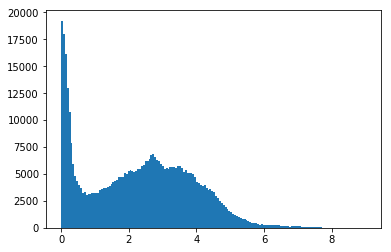

In [315]:
#data of all 30 degree traj (to both posts)
spee=np.array(d_v3)[:,0]
#spee[np.where(spee>9)[0]] = np.nan
#plt.hist(spee)
spee_selector = (spee<9)
plt.hist(spee[spee_selector], bins= 160, label='')

(244962, 2)

(0, 8)

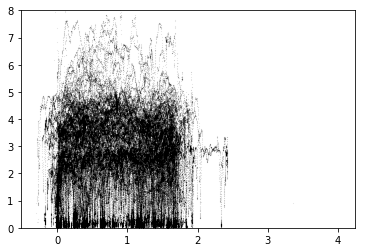

In [106]:
#color can get a list of colors to use for certain ID of the fly /locust

plt.scatter(np.array(d_v2)[:,1], np.array(d_v2)[:,0], c='black', s=0.001, alpha=1)
plt.ylim([0,8])

In [107]:
#p1_traj[:,9] x, column 10 = y
# calc distance to post

distances1 =np.array( ((dot_x - p1_traj['x_rot'])**2 + (dot_y - p1_traj['y_rot'])**2 )**0.5)
distances1 = np.array(distances1[window/2:-window/2])
distances1.shape


(244962,)

In [140]:
speeds = np.array(d_v2)[:,0]
speeds.shape

(244962,)

In [276]:
#
speeds[np.where(speeds>9)[0]] = np.nan
speeds[np.where(speeds<0)[0]] = np.nan

speed_selector = (speeds>0.75)
stop_selector = (speeds<0.05)

#stops = speeds[np.where(speeds<0.9)[0]]

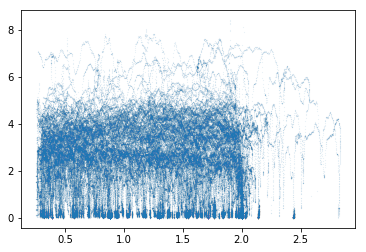

In [277]:
#distance to post1 -- speeds

plt.scatter(distances1,speeds,s=0.001, alpha=1)


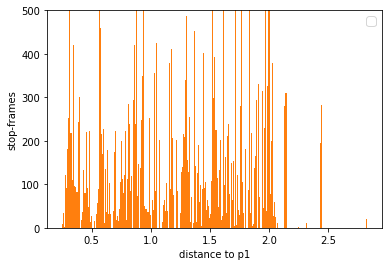

In [384]:
# plots only frames where speed< 0,05. dist p1 -- stoop frames
#plt.scatter(distances1[stop_selector],speeds[stop_selector],s=0.1, alpha=1)
plt.ylim([0,500])
plt.xlabel('distance to p1')
plt.ylabel('stop-frames')

plt.legend(fontsize=12)
plt.hist(distances1[stop_selector], bins= 300, label='')
counts, bins, bars = plt.hist(distances1[stop_selector], bins= 300)


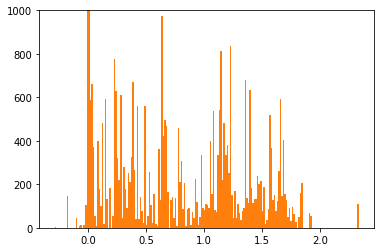

In [382]:
stop_selector = (speeds<0.3)

plt.hist(np.array(d_v2)[:,1][stop_selector], bins= 200, label='')
plt.ylim([0,1000])
counts, bins, bars = plt.hist(np.array(d_v2)[:,1][stop_selector], bins= 200)


In [389]:
counts[np.where(counts>500)]

array([ 641.,  502.,  879.,  576.,  864.,  538.,  701.,  825.,  616.,
        707., 7749.,  593.])

In [390]:
bins[np.where(counts>500)]

array([0.31101951, 0.56001924, 0.87770856, 0.93781194, 1.52167339,
       1.60753537, 1.71056974, 1.76208693, 1.83077651, 1.96815567,
       1.99391427, 2.00250047])

In [372]:
bins[np.where(counts>200)]

array([-3.81871078e-03,  3.71393007e-04,  2.30827101e-01,  2.76918243e-01,
        1.22807180e+00,  1.56747021e+00])

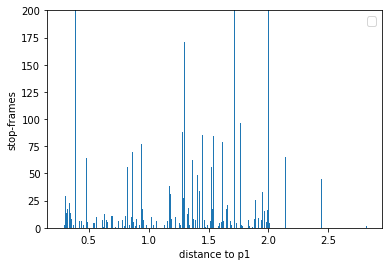

In [342]:
plt.ylim([0,200])
plt.xlabel('distance to p1')
plt.ylabel('stop-frames')


plt.hist(distances1[stop_selector], bins= 600, label='')
plt.legend(fontsize=12)


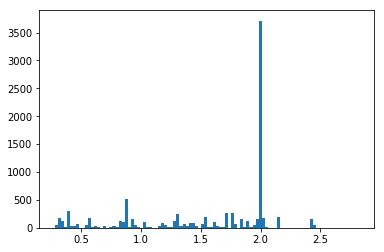

In [305]:
counts, bins, bars = plt.hist(distances1[stop_selector], bins= 100)
#counts is value in the bin

# apply fourier!

In [181]:
print(angle_used*180/math.pi)

30.0


In [159]:
#statistics, bin_edges, binnum = stats.binned_statistic(distances1[stop_selector],speeds[stop_selector],statistic='median',bins=150)
#bin_mids = (bin_edges[0:-1]+bin_edges[1:])/2
#plt.scatter(bin_mids,statistics,label='only speed<0.')

#plt.hist()

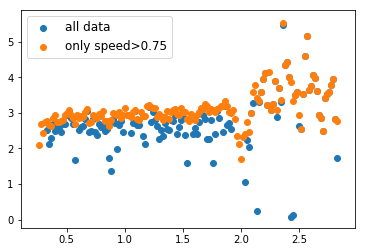

In [187]:
#median speed values per distance bin 

statistics, bin_edges, binnum = stats.binned_statistic(distances1,speeds,statistic='median',bins=150)
bin_mids = (bin_edges[0:-1]+bin_edges[1:])/2
plt.scatter(bin_mids,statistics,label='all data')

statistics, bin_edges, binnum = stats.binned_statistic(distances1[speed_selector],speeds[speed_selector],statistic='median',bins=150)
bin_mids = (bin_edges[0:-1]+bin_edges[1:])/2
plt.scatter(bin_mids,statistics,label='only speed>0.75')
#plt.ylim([1,3.5])
#plt.xlim([0,1])

plt.legend(fontsize=12)

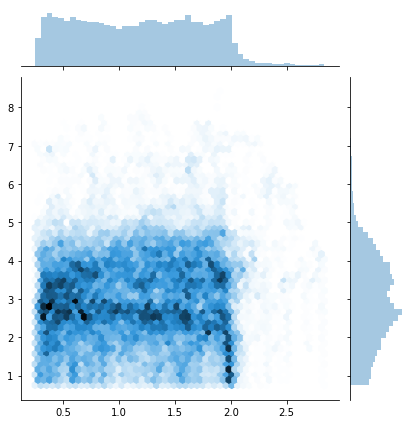

In [118]:
import seaborn as sns
sns.jointplot(distances1[speed_selector],speeds[speed_selector],kind='hex')

In [121]:
#stats

#df6.describe()
speed_df= pd.DataFrame(speeds)#
#speed_df.describe()


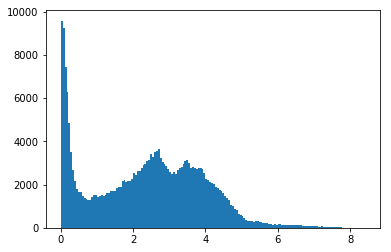

In [227]:
#plt.hist(speeds)




pylab.figure()
pylab.hist(speeds[~np.isnan(speeds)], bins=160)
pylab.show()

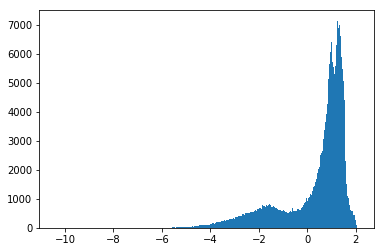

In [325]:
counts, bins, bars = pylab.hist(np.log(speeds[~np.isnan(speeds)]), bins =360)


TypeError: %o format: a number is required, not numpy.ndarray

In [228]:
#path = '/home/bianca/Documents/github/locustVR/plotting/csv_rot_data/'
with open(path+'two_post_speeds'+'_'+str(ANGLE)  +'.csv', 'w') as output:
    csv.writer(output, delimiter=',').writerows(np.array(d_v2))
 


# gamma-mixture model

In [ ]:
data = mixture.DataSet()
data.fromList(d_v2)



ValueError: x and y must be the same size

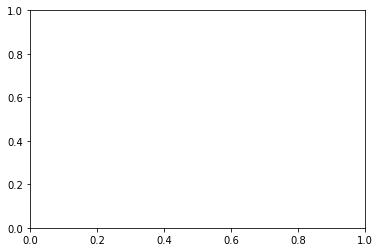

In [103]:
#x_coord -- speed

plt.scatter(df6['x_rot'][window:],speeds,s=0.0001, alpha=1)

#df6['x'][:]

(array([6.86560e+04, 1.06503e+05, 1.04195e+05, 1.16205e+05, 1.00358e+05,
        4.61400e+03, 1.35400e+03, 7.16000e+02, 1.00000e+00, 1.00000e+00]),
 array([-0.30852875,  0.12529639,  0.55912152,  0.99294666,  1.42677179,
         1.86059693,  2.29442206,  2.7282472 ,  3.16207233,  3.59589747,
         4.0297226 ]),
 <a list of 10 Patch objects>)

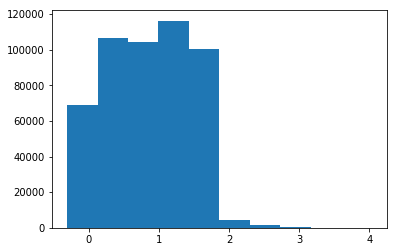

In [169]:
plt.hist(df6['x_rot'])


In [170]:
df6.shape

(502603, 11)

In [171]:
len(speeds)

502601

(array([136803.,  51518.,  70606.,  83684.,  72334.,  49277.,  21559.,
          9461.,   4938.,   2421.]),
 array([0.        , 0.79999621, 1.59999241, 2.39998862, 3.19998482,
        3.99998103, 4.79997724, 5.59997344, 6.39996965, 7.19996585,
        7.99996206]),
 <a list of 10 Patch objects>)

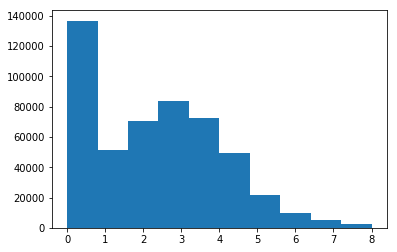

In [172]:
plt.hist(speeds)

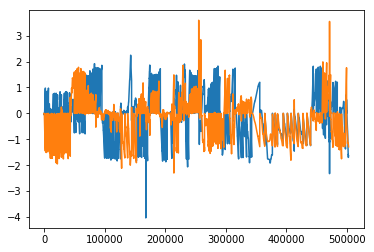

In [134]:
plt.plot(df6['x'][:])
plt.plot(df6['y'][:])
# plt.xlim([8700,11200])

(array([6.00000e+00, 2.00000e+00, 2.00000e+00, 2.00000e+00, 8.00000e+00,
        3.00000e+00, 5.02556e+05, 1.30000e+01, 7.00000e+00, 3.00000e+00]),
 array([-2159.99673581, -1836.23971434, -1512.48269286, -1188.72567139,
         -864.96864991,  -541.21162844,  -217.45460697,   106.30241451,
          430.05943598,   753.81645746,  1077.57347893]),
 <a list of 10 Patch objects>)

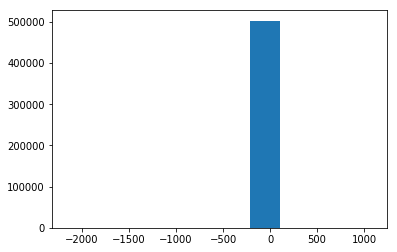

In [135]:
tt  = df6['t']
plt.hist(np.diff(tt))

In [136]:
xx = df6['x']
yy = df6['y']
distxxyy = np.sqrt(np.diff(xx)**2+np.diff(yy)**2)
speed = distxxyy/np.diff(tt)

/home/bianca/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in divide
  after removing the cwd from sys.path.
/home/bianca/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in divide
  after removing the cwd from sys.path.


(array([165806.,  68287.,  54327.,  63956.,  60859.,  48604.,  35061.,
         23213.,  11467.,   5184.]),
 array([0.        , 0.02428692, 0.04857384, 0.07286077, 0.09714769,
        0.12143461, 0.14572153, 0.17000845, 0.19429538, 0.2185823 ,
        0.24286922]),
 <a list of 10 Patch objects>)

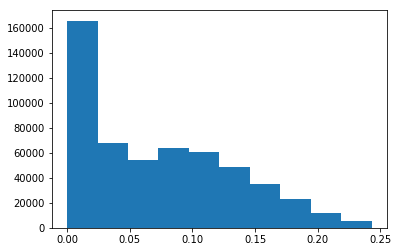

In [85]:
dt = 1/100.0
threshold = np.quantile(distxxyy,0.99)
plt.hist(distxxyy[distxxyy<threshold]/dt)

In [86]:
np.quantile(distxxyy,[0.95,0.99,1])

array([1.87749777e-03, 2.42869656e-03, 4.21449817e+00])

In [87]:
np.quantile(np.diff(tt),[0.95,0.99,1])

array([4.74081000e-02, 5.54991865e-02, 1.07757348e+03])

/home/bianca/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

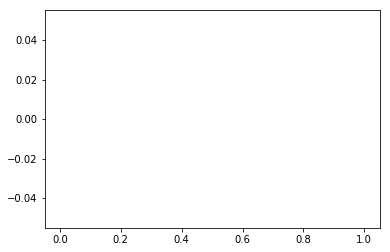

In [88]:
threshold = np.quantile(speed,0.99)
plt.hist(speed[speed<threshold])